In [4]:
# Cell 0: If you haven’t run Part 1 yet, do it now:
import os, joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# make sure outputs folder exists
os.makedirs("../outputs", exist_ok=True)

# load raw CSV (adjust path if needed)
df = pd.read_csv("../winequality-red.csv")

# binarize target
df["good"] = (df.quality >= 7).astype(int)

# features & label
X = df.drop(columns=["quality", "good"])
y = df["good"]

# split & scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# save for Parts 2–7
joblib.dump((X_train, X_test, y_train, y_test), "../outputs/part1_data.pkl")
print("✅ Created ../outputs/part1_data.pkl")


✅ Created ../outputs/part1_data.pkl


In [5]:
import os, joblib, pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier, VotingClassifier
from sklearn.svm             import SVC

# ensure outputs folder exists
os.makedirs("../outputs", exist_ok=True)

# load X_train, X_test, y_train, y_test from Part 1
X_train, X_test, y_train, y_test = joblib.load("../outputs/part1_data.pkl")
print("Data shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Data shapes: (1279, 11) (320, 11) (1279,) (320,)


In [6]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest"      : RandomForestClassifier(n_estimators=50, random_state=42),
    "SVC"               : SVC(probability=True, random_state=42)
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    results[name] = clf.score(X_test, y_test)
    print(f"{name:20s} → {results[name]:.4f}")


LogisticRegression   → 0.8938
RandomForest         → 0.9375
SVC                  → 0.9000


In [7]:
hard_vc = VotingClassifier(estimators=list(models.items()), voting="hard")
hard_vc.fit(X_train, y_train)
results["HardVoting"] = hard_vc.score(X_test, y_test)

soft_vc = VotingClassifier(estimators=list(models.items()), voting="soft")
soft_vc.fit(X_train, y_train)
results["SoftVoting"] = soft_vc.score(X_test, y_test)

print("\nVoting results:")
for key in ["HardVoting","SoftVoting"]:
    print(f"{key:20s} → {results[key]:.4f}")



Voting results:
HardVoting           → 0.9062
SoftVoting           → 0.9094


In [8]:
df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
df = df.sort_values("Accuracy", ascending=False)
df


,Accuracy
RandomForest,0.937500
SoftVoting,0.909375
HardVoting,0.906250
SVC,0.900000
LogisticRegression,0.893750


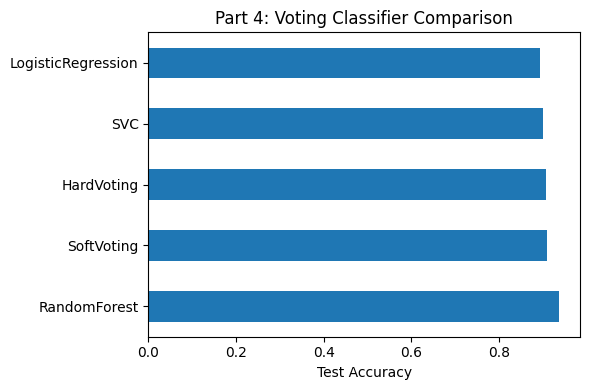

In [9]:
ax = df["Accuracy"].plot.barh(figsize=(6,4))
ax.set_xlabel("Test Accuracy")
ax.set_title("Part 4: Voting Classifier Comparison")
plt.tight_layout()
plt.savefig("../outputs/part4_accuracy_comparison.png")
plt.show()


SyntaxError: invalid syntax (165582376.py, line 3)